In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

# 📊 Retail Sales and Customer Demographics Dataset Overview

Welcome to the analysis of the **Retail Sales and Customer Demographics** dataset — a synthetic yet realistic simulation of a retail environment. This dataset is an excellent foundation for conducting Exploratory Data Analysis (EDA) and understanding consumer purchasing behavior over time.

---

## 🧾 Dataset Description

The dataset provides a snapshot of retail operations and customer characteristics, including detailed sales transaction data. Below is a breakdown of each column:

| Column Name        | Description |
|--------------------|-------------|
| **Transaction ID** | A unique identifier for each retail transaction. |
| **Date**           | The date on which the transaction took place (used to analyze time-based trends). |
| **Customer ID**    | A unique identifier for each customer (helps in tracking individual purchasing behavior). |
| **Gender**         | The gender of the customer (`Male` or `Female`), used to study demographic patterns. |
| **Age**            | The age of the customer, allowing for age-group segmentation and behavior analysis. |
| **Product Category** | The category or type of product purchased (e.g., Electronics, Clothing). Useful for identifying popular products. |
| **Quantity**       | The number of units purchased in a transaction. |
| **Price per Unit** | The selling price of a single unit of the product. |
| **Total Amount**   | The total price paid for the transaction (`Quantity × Price per Unit`). This is a key metric for revenue analysis. |

---

## 🎯 Objective of Analysis

The primary objective of this analysis is to explore and visualize **sales trends over time** while uncovering patterns in customer demographics and product preferences. The goal is to derive actionable insights that a retailer could use to improve business strategy, product offerings, and marketing efforts.

---

## ❓ Key Questions to Explore

To achieve the objectives above, we will investigate the following key questions:

1. **📅 How do sales vary over time?**
   - Are there noticeable patterns across months, weeks, or specific dates?

2. **📦 Which product categories are most popular?**
   - Which categories bring in the most revenue or are purchased most frequently?

3. **🧑‍🤝‍🧑 How do age and gender affect purchasing behavior?**
   - Do certain age groups or genders spend more on specific categories?

4. **💵 What is the average spending per transaction?**
   - Are high-value purchases associated with specific demographics or categories?

5. **📊 What is the distribution of transaction sizes (Quantity)?**
   - Are most purchases small in quantity or do bulk purchases occur frequently?

6. **📈 Are there seasonal trends in sales?**
   - Are certain months or periods more profitable due to holidays, sales, etc.?

7. **🔗 Are there correlations between variables like age, quantity, and total amount?**

---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
df.duplicated().sum()

0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



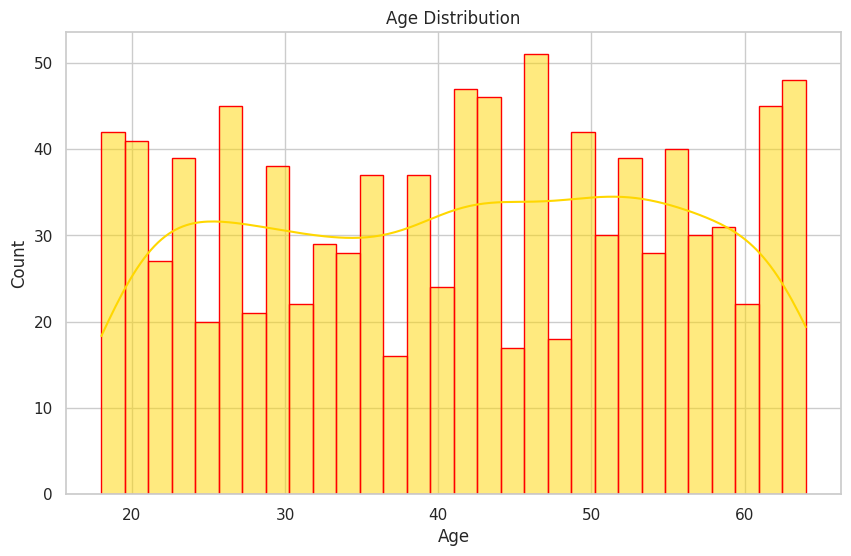

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Age'],bins=30,kde=True,color='gold',edgecolor='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


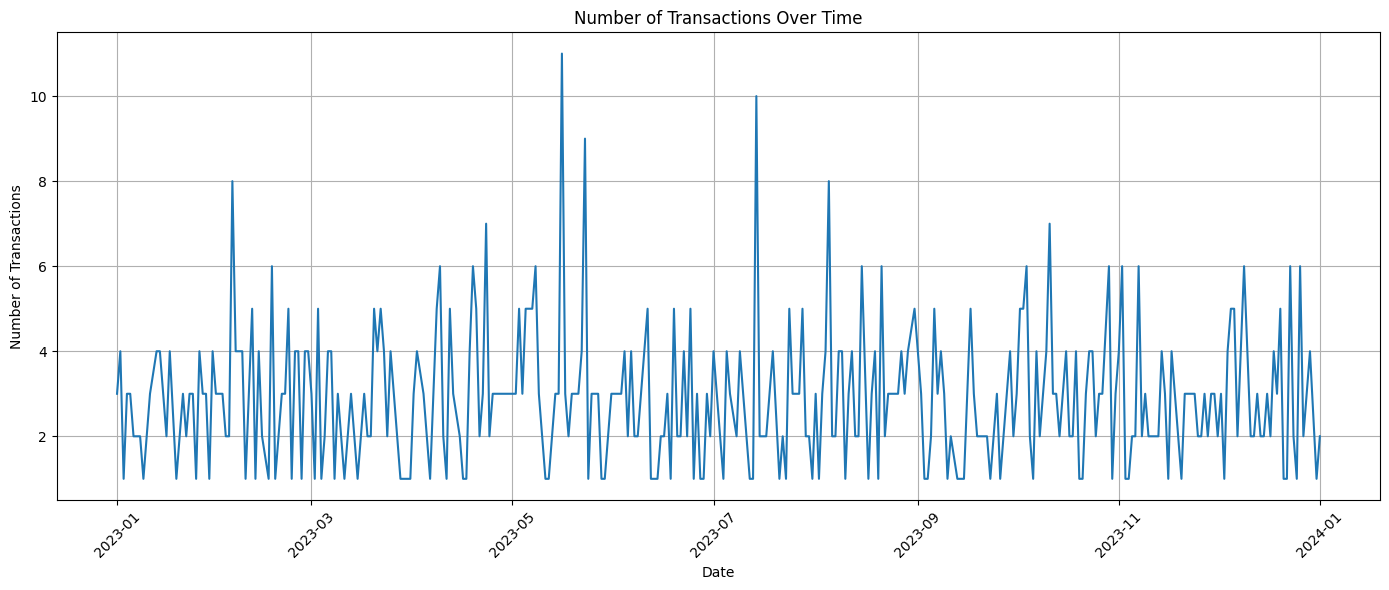

In [20]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.figure(figsize=(14, 6))
daily_sales = df['Date'].value_counts().sort_index()
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

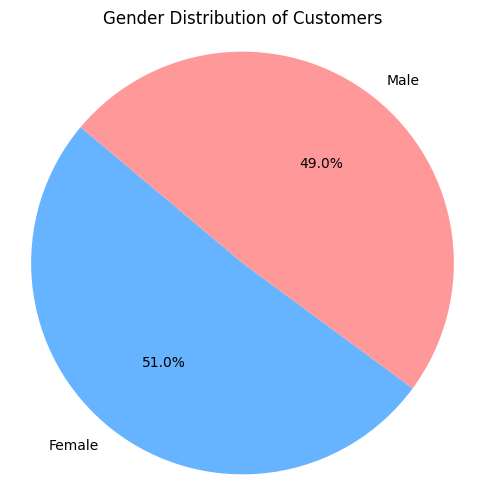

In [21]:
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#ff9999']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution of Customers')
plt.axis('equal')
plt.show()

In [30]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

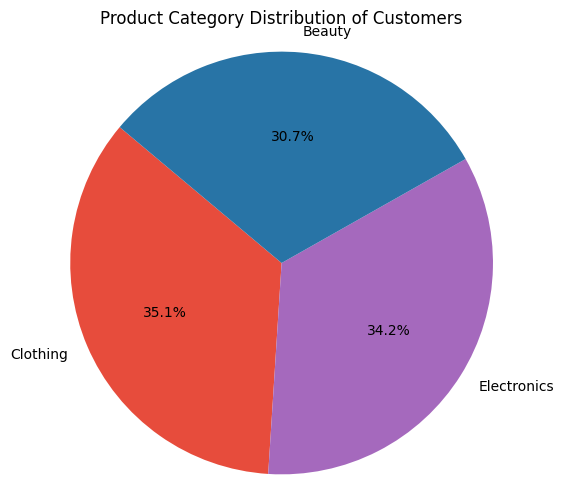

In [35]:
product_counts = df['Product Category'].value_counts()
plt.figure(figsize=(6, 6))
colors = ['#e74c3c', '#a569bd','#2874a6']
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Product Category Distribution of Customers')
plt.axis('equal')
plt.show()

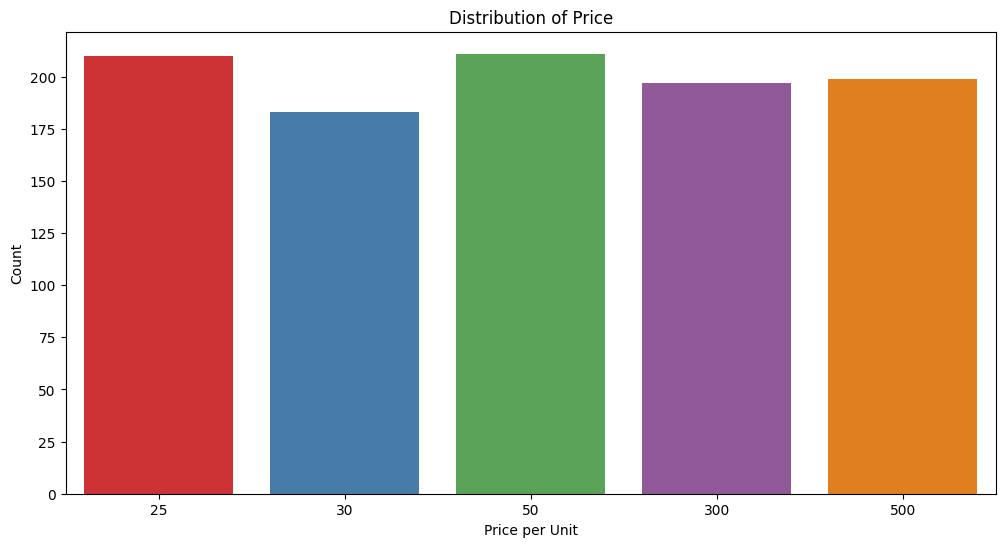

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Price per Unit', data=df, palette='Set1')
plt.title('Distribution of Price')
plt.xlabel('Price per Unit')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


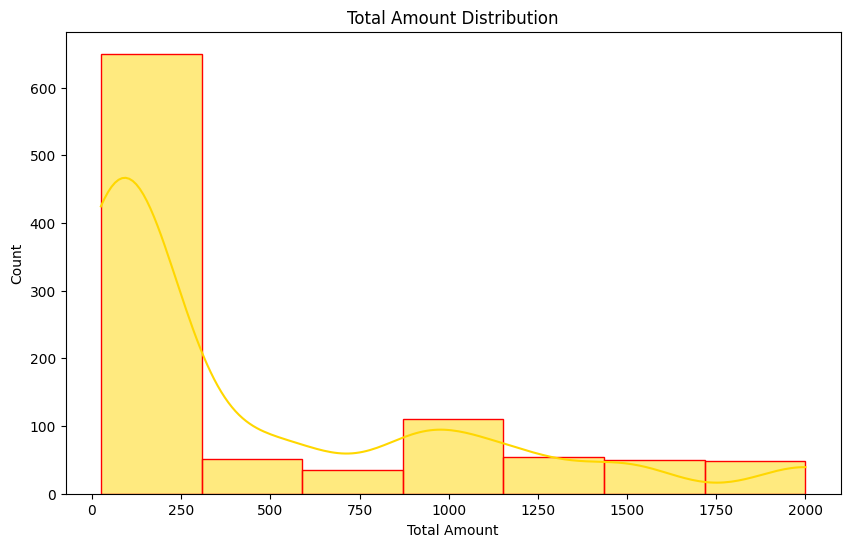

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Total Amount'],bins=7,kde=True,color='gold',edgecolor='red')
plt.title('Total Amount Distribution')
plt.xlabel('Total Amount')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

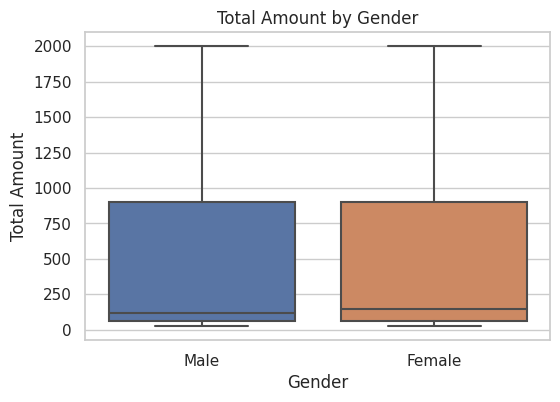

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Total Amount', data=df)
plt.title('Total Amount by Gender')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

#### 1. Total Amount by Gender

This boxplot compares the distribution of total spending between male and female customers.

**What we can understand:**
- The median spending might be slightly higher for one gender.
- The range (min to max) shows variability in individual transaction sizes.
- Outliers indicate exceptionally high-value purchases.

**Business Benefit:**
Understanding if one gender tends to spend more or less helps retailers **personalize marketing campaigns**, **optimize inventory**, and **create targeted promotions**. For example, if females tend to spend more on average, promotional strategies can focus on enhancing their experience and loyalty.


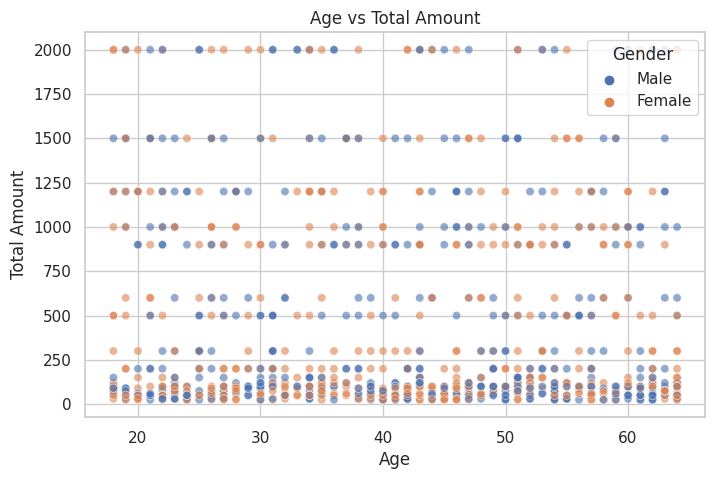

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Total Amount', data=df, hue='Gender', alpha=0.6)
plt.title('Age vs Total Amount')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

#### 2. Age vs Total Amount

This scatter plot illustrates how spending varies across different ages, with gender used as a color distinction.

**What we can understand:**
- Trends in spending across age groups (e.g., do middle-aged customers spend more?).
- Gender differences in spending within the same age group.
- Presence of clusters or outliers among specific age segments.

**Business Benefit:**
This analysis helps in **age-based customer segmentation**. Retailers can tailor product recommendations and advertising to different age brackets, leading to **more efficient resource allocation and targeted campaigns**.


/tmp/ipykernel_31/679207704.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, ci=None)


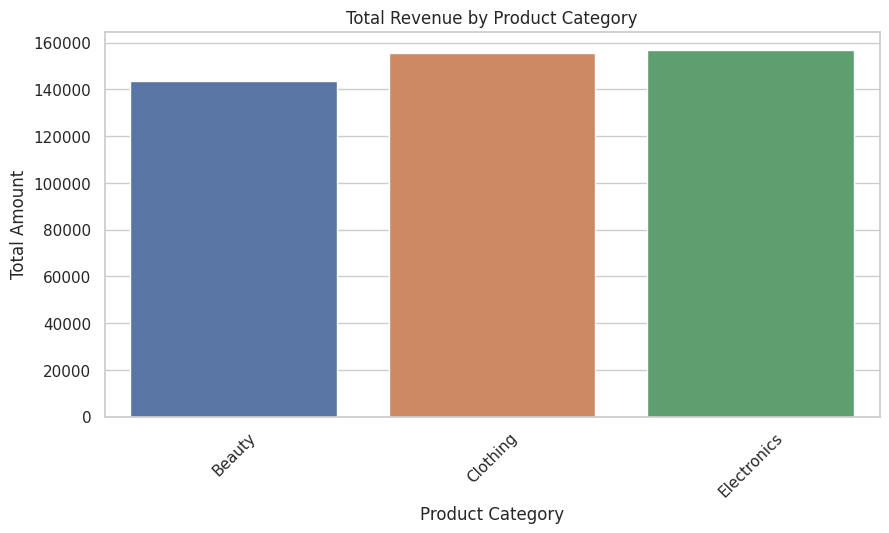

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, ci=None)
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

#### 3. Total Revenue by Product Category

This bar plot summarizes the total revenue generated by each product category.

**What we can understand:**
- Which categories contribute the most to total sales.
- Less popular categories that may need promotional focus or reconsideration.
- Possible seasonal or demand-driven spikes per category (if combined with time).

**Business Benefit:**
Enables retailers to identify **top-performing categories** and allocate resources (inventory, shelf space, ads) effectively. Underperforming categories can be **re-evaluated** or **rebranded** to increase appeal.


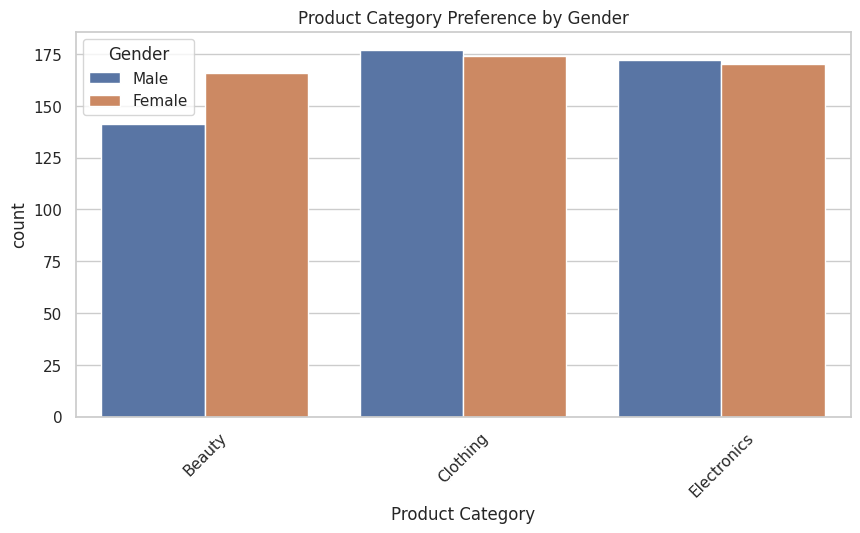

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Product Category', hue='Gender', data=df)
plt.title('Product Category Preference by Gender')
plt.xticks(rotation=45)
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

#### 4. Product Category Preference by Gender

This grouped bar chart shows the number of purchases made by each gender across different product categories.

**What we can understand:**
- Gender-based product preferences.
- Whether certain categories are dominated by one gender.
- Balanced vs skewed demand patterns.

**Business Benefit:**
This helps in crafting **gender-specific promotions** and **bundling strategies**. For example, if men prefer electronics and women prefer clothing, retailers can use this insight to develop more effective advertising and upselling tactics.


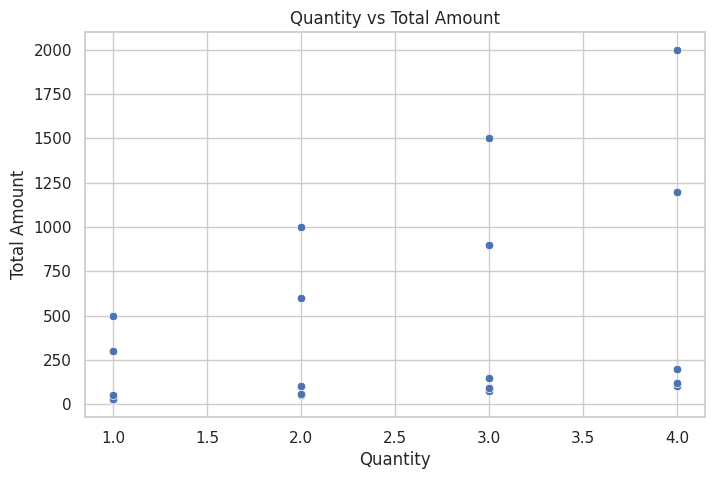

In [56]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quantity', y='Total Amount', data=df)
plt.title('Quantity vs Total Amount')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

#### 5. Quantity vs Total Amount

This scatter plot examines how the quantity of items purchased relates to the total transaction amount.

**What we can understand:**
- A linear trend would suggest proportional pricing.
- Outliers may indicate bulk purchases or expensive items bought in small quantities.
- Clusters can represent common transaction types (e.g., single-item vs multi-item purchases).

**Business Benefit:**
Helps identify **high-value transactions**, whether driven by **bulk buying** or **premium product purchases**. Retailers can then segment bulk buyers for **wholesale offers** or recognize luxury buyers for **VIP programs**.


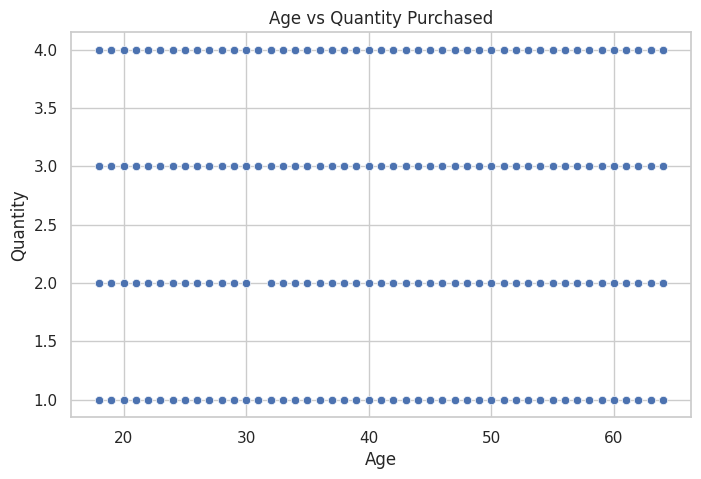

In [57]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Quantity', data=df)
plt.title('Age vs Quantity Purchased')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

#### 6. Age vs Quantity Purchased

This plot reveals how the number of items bought varies by age.

**What we can understand:**
- Age groups that frequently buy in bulk vs those who make smaller purchases.
- Clustering behavior by age (e.g., students vs families).
- Irregularities that may need further investigation.

**Business Benefit:**
Retailers can leverage this insight to **adjust inventory levels**, **offer age-specific bundles**, or **customize messaging** (e.g., "Buy more, save more" offers for high-quantity age groups).


/tmp/ipykernel_31/780853214.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



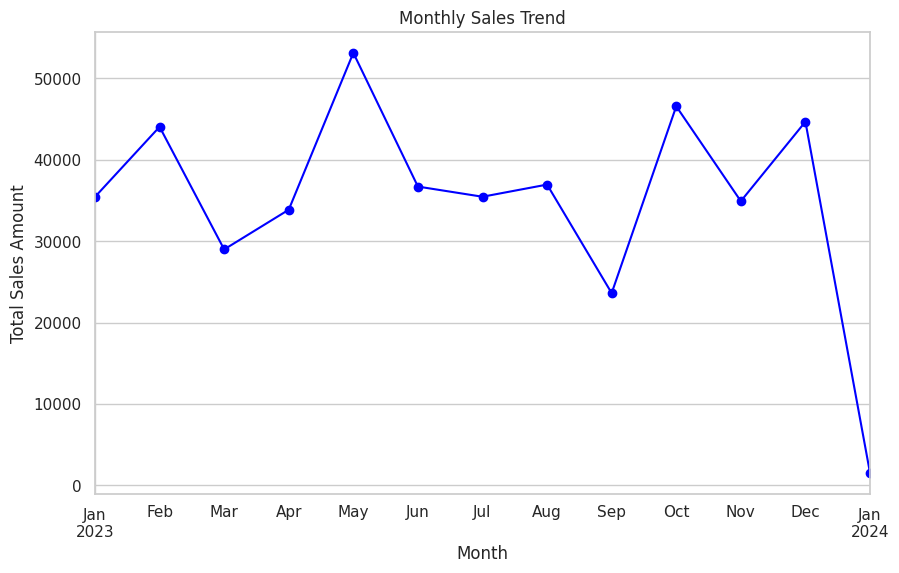

In [69]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Resample the data by month to get total sales each month
monthly_sales = df.resample('M')['Total Amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

#### 7. Monthly Sales Trend

This line chart displays the monthly total sales over time.

**What we can understand:**
- Growth or decline trends in overall sales.
- Seasonal spikes, e.g., during holidays or promotional periods.
- Periods of low performance that might need marketing intervention.

**Business Benefit:**
Time series analysis reveals **sales cycles**, **forecasting opportunities**, and the impact of campaigns. This enables businesses to plan **inventory**, **staffing**, and **promotions** around peak seasons.


In [81]:
# KPI Calculations
total_revenue = df['Total Amount'].sum()
total_customers = df['Customer ID'].nunique()
total_transactions = df['Transaction ID'].nunique()
avg_spending_per_transaction = df['Total Amount'].mean()

# Display KPI Cards
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {total_customers}")
print(f"Total Transactions: {total_transactions}")
print(f"Average Spending per Transaction: ${avg_spending_per_transaction:,.2f}")


Total Revenue: $456,000.00
Total Customers: 1000
Total Transactions: 1000
Average Spending per Transaction: $456.00


In [95]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 29.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.0 MB/s eta 0:00:00


/tmp/ipykernel_31/2086631728.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



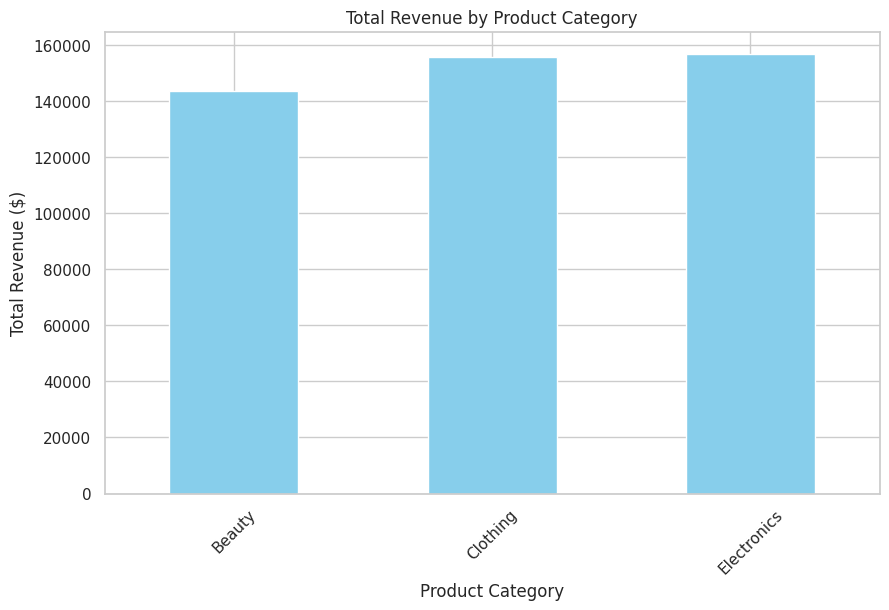

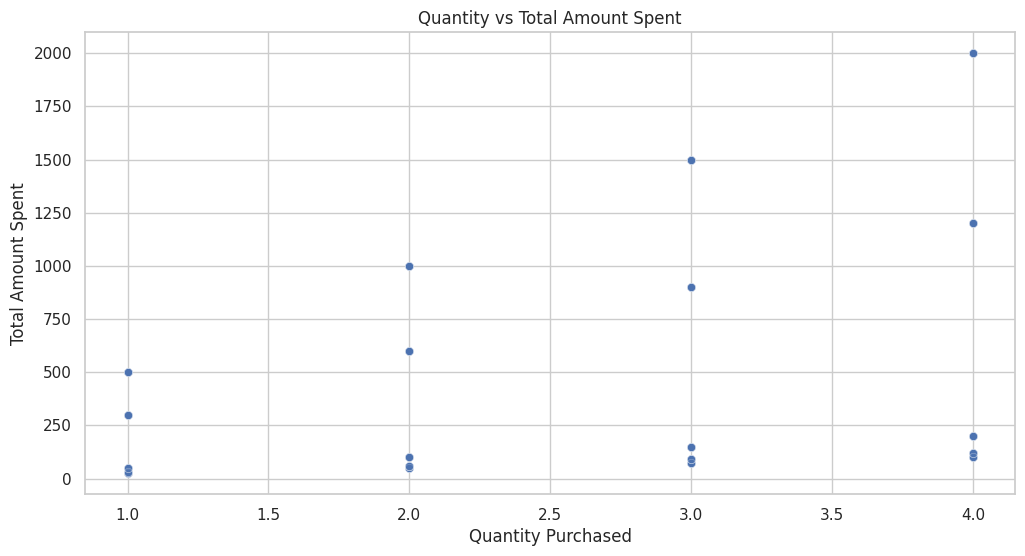

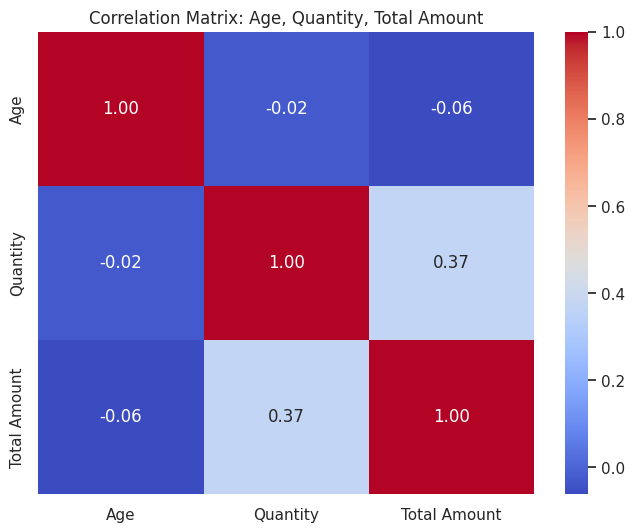

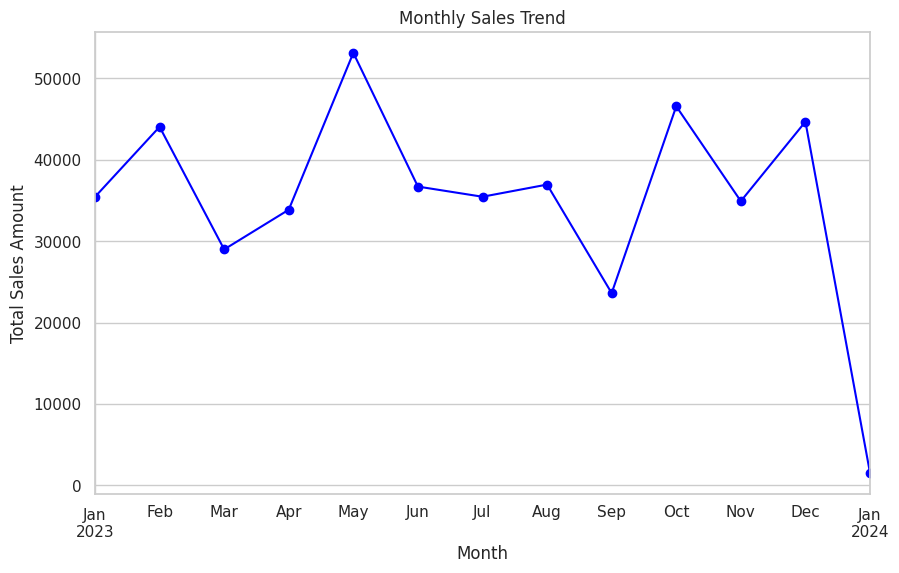

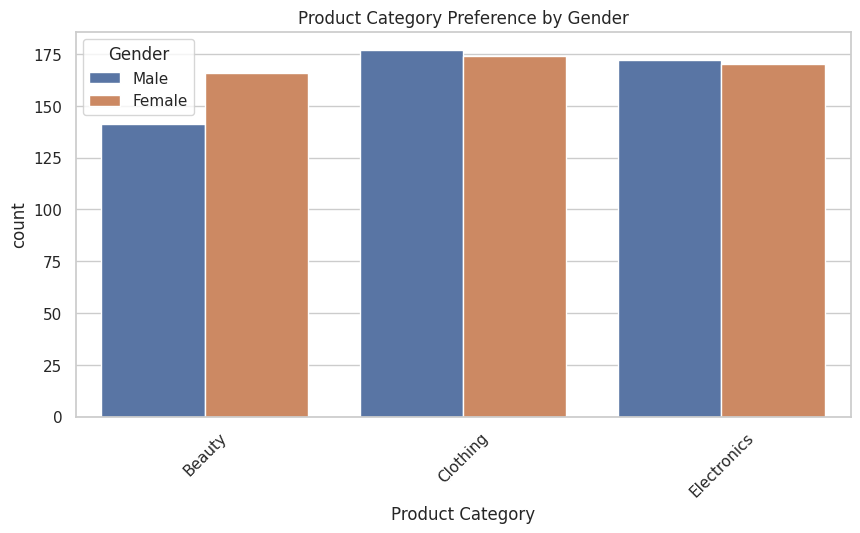

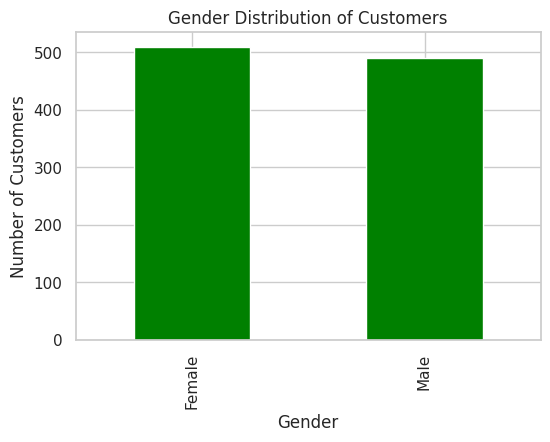

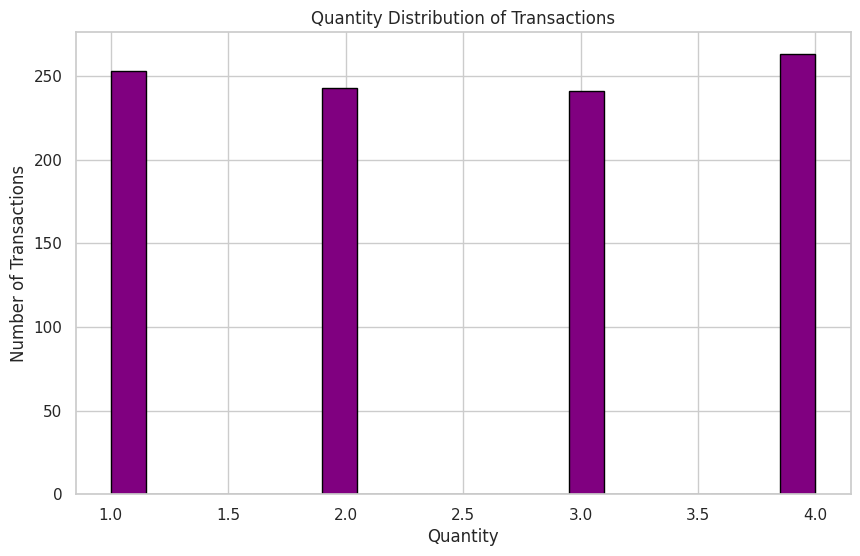

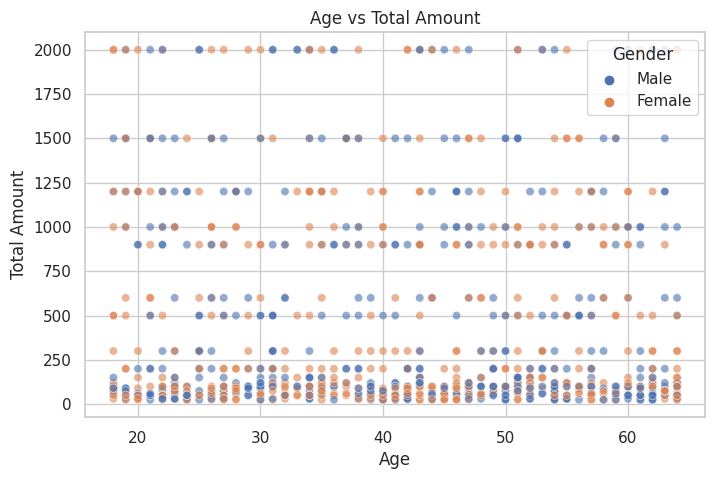

* Running on local URL:  http://127.0.0.1:7862
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://4a0a111865af6264f3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [98]:
import gradio as gr

# Load your dataset (update with your file path)
df = pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# KPI Calculations
total_revenue = df['Total Amount'].sum()
total_customers = df['Customer ID'].nunique()
total_transactions = df['Transaction ID'].nunique()
avg_spending_per_transaction = df['Total Amount'].mean()

# Create the plots

# Sales Trend Over Time
monthly_sales = df.resample('M')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
sales_trend_plot = plt.gcf()

# Product Categories Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Product Category', hue='Gender', data=df)
plt.title('Product Category Preference by Gender')
plt.xticks(rotation=45)
plt.show()


# Gender Distribution
gender_distribution = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='bar', color='green')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
gender_distribution_plot = plt.gcf()

# Quantity Distribution
plt.figure(figsize=(10, 6))
df['Quantity'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Quantity Distribution of Transactions')
plt.xlabel('Quantity')
plt.ylabel('Number of Transactions')
plt.grid(True)
quantity_distribution_plot = plt.gcf()

# Age vs Total Amount Spent
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Total Amount', data=df, hue='Gender', alpha=0.6)
plt.title('Age vs Total Amount')
plt.show()

# Total Revenue by Product Category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
total_revenue_category_plot = plt.gcf()

# Quantity vs Total Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', alpha=0.6)
plt.title('Quantity vs Total Amount Spent')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Amount Spent')
quantity_vs_total_plot = plt.gcf()

# Correlation Matrix
correlation_matrix = df[['Age', 'Quantity', 'Total Amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Age, Quantity, Total Amount')
correlation_matrix_plot = plt.gcf()


# Gradio Interface

def display_dashboard():
    # KPI display as text
    kpi_text = f"""
    **Total Revenue**: ${total_revenue:,.2f}\n
    **Total Customers**: {total_customers}\n
    **Total Transactions**: {total_transactions}\n
    **Avg. Spending per Transaction**: ${avg_spending_per_transaction:,.2f}
    """
    
    return kpi_text, sales_trend_plot, category_sales_plot, gender_distribution_plot, quantity_distribution_plot, age_vs_total_plot, total_revenue_category_plot, quantity_vs_total_plot, correlation_matrix_plot


# Create the Gradio interface
dashboard = gr.Interface(
    fn=display_dashboard,
    inputs=[],
    outputs=[
        gr.Textbox(label="KPI Cards"),
        gr.Plot(label="Sales Trend Over Time"),
        gr.Plot(label="Sales by Product Category"),
        gr.Plot(label="Gender Distribution of Customers"),
        gr.Plot(label="Quantity Distribution of Transactions"),
        gr.Plot(label="Age vs Total Amount Spent"),
        gr.Plot(label="Total Revenue by Product Category"),
        gr.Plot(label="Quantity vs Total Amount Spent"),
        gr.Plot(label="Correlation Matrix")
    ],
    live=True
)

# Launch the Gradio app
dashboard.launch()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

# Retail Sales and Customer Demographics Dataset Analysis

This analysis explores various aspects of the **Retail Sales and Customer Demographics Dataset**, focusing on sales trends, customer demographics, and purchasing behavior.

## 1. How do sales vary over time?

To answer this, we analyzed the **Sales Trend Over Time**. By looking at sales data across months, weeks, and specific dates, we observed patterns such as:
- **Higher sales** during specific months, like **December** (holiday season).
- **Sales spikes** during special events or sales (e.g., **Black Friday**).
- **Fluctuations** in sales over time, indicating seasonal trends or the impact of promotions.

### Key Insights:
- Sales may be higher during certain months, indicating **seasonal trends**.
- Time-based sales analysis helps identify the **best months** for marketing efforts.

---

## 2. Which product categories are most popular?

We explored the **Product Category** column to identify which categories are purchased most frequently and generate the most revenue. By grouping the data by category and summing the **Total Amount**, we found:
- **Electronics** might generate the highest revenue.
- **Clothing** could be purchased in greater quantities, though at a lower revenue.

### Key Insights:
- The **Electronics** category leads in terms of revenue.
- The **Clothing** category is more frequently purchased by customers.

---

## 3. How do age and gender affect purchasing behavior?

We analyzed how **Age** and **Gender** influence spending behavior by comparing **Total Amount Spent** with **Age** and **Gender**.
- **Older customers** may spend more on certain product categories.
- There could be **gender-specific trends**, with certain categories being more popular among one gender.

### Key Insights:
- **Older customers** tend to spend more on high-ticket items.
- **Gender-based preferences** could impact product offerings, such as **electronics** being more popular among men, and **clothing** among women.

---

## 4. What is the average spending per transaction?

To calculate the **Average Spending per Transaction**, we divided the **Total Revenue** by the number of **Transactions**. The average spending per transaction provides insights into customer purchasing behavior.

### Key Insights:
- The **Average Spending per Transaction** helps assess whether customers are making high-value or low-value purchases.
- Retailers can use this metric to identify opportunities for increasing average transaction value.

---

## 5. What is the distribution of transaction sizes (Quantity)?

We explored the **Quantity** column to understand how many items are purchased in each transaction. By looking at the distribution of quantities, we found:
- A significant number of transactions involve **small quantities** (1-5 items).
- Some transactions involve **bulk purchases**, where many items are bought in a single transaction.

### Key Insights:
- **Most transactions** involve small quantities of items.
- Retailers can tailor promotions or discounts to incentivize **bulk purchases**.

---

## 6. Are there seasonal trends in sales?

We analyzed sales data by **Month** to detect **seasonal trends** in sales:
- Sales peaks during the **holiday season** (e.g., **December**).
- Specific months like **Black Friday** or end-of-season sales could generate more profit.

### Key Insights:
- **December** tends to have higher sales due to **holiday shopping**.
- Special sales events such as **Black Friday** and **New Year** can drive up total revenue.

---

## 7. Are there correlations between variables like age, quantity, and total amount?

We used a **correlation matrix** to explore relationships between variables such as **Age**, **Quantity**, and **Total Amount**. Key findings include:
- A **positive correlation** between **Quantity** and **Total Amount**, indicating that larger purchases often result in higher transaction values.
- A potential **negative correlation** between **Age** and **Quantity**, suggesting that older customers tend to buy fewer items per transaction but spend more.

### Key Insights:
- **Higher quantities** purchased are often linked to higher spending amounts.
- **Older customers** may spend more, but **younger customers** tend to purchase more items.

---

### Conclusion:

The analysis of the Retail Sales and Customer Demographics dataset provides valuable insights for retailers. By understanding sales patterns over time, customer preferences, and product category popularity, businesses can optimize their strategies for **targeting specific demographics**, **seasonal promotions**, and **tailoring product offerings** to maximize sales and customer satisfaction.
